In [1]:
# Reference: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
# Data: https://support.10xgenomics.com/single-cell-gene-expression/datasets/1.1.0/pbmc3k?
# Satija et al., 2015

In [1]:
import numpy as np
import scanpy as sc
import pandas as pd


In [2]:
sc.settings.verbosity = 0
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

# Verbosity levels are used to control the amount and type of output (logs) you see during the execution of scanpy functions
# The header generally includes information about the scanpy version, the versions of its dependencies, and possibly system information like the number of cores
# dpi=80 sets the dots-per-inch resolution of the figures. This affects the quality and size of your plots.
# facecolor='white' sets the background color of the figures to white.

2023-12-20 23:32:42.127903: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.24.3 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11


In [3]:
adata = sc.read_10x_mtx('filtered_gene_bc_matrices/hg19/', 
                       var_names = 'gene_symbols',
                       cache=True)

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [4]:
adata.var_names_make_unique()

In [5]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

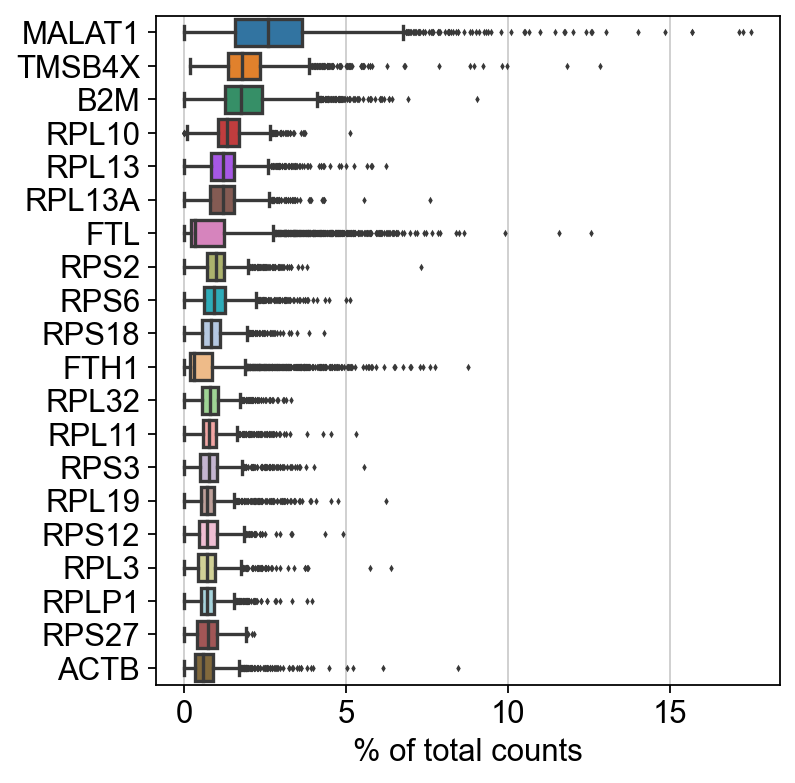

In [6]:
sc.pl.highest_expr_genes(adata, n_top=20, ) #pl : plotting


In [7]:
# Basic preprocessing

sc.pp.filter_cells(adata, min_genes=200) # n_genes
sc.pp.filter_genes(adata, min_cells=3) # n_cells

In [8]:
adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [9]:
adata.var.head(5)

gene_ids  n_cells
AL627309.1     ENSG00000237683        9
AP006222.2     ENSG00000228463        3
RP11-206L10.2  ENSG00000228327        5
RP11-206L10.9  ENSG00000237491        3
LINC00115      ENSG00000225880       18

In [10]:
adata.var['n_cells'].head(5)

AL627309.1        9
AP006222.2        3
RP11-206L10.2     5
RP11-206L10.9     3
LINC00115        18
Name: n_cells, dtype: int64

In [11]:
# to make boolean if a gene is mitochondrial gene
adata.var['mt'] = adata.var_names.str.startswith('MT-')


In [12]:
adata.var.head(5)

gene_ids  n_cells     mt
AL627309.1     ENSG00000237683        9  False
AP006222.2     ENSG00000228463        3  False
RP11-206L10.2  ENSG00000228327        5  False
RP11-206L10.9  ENSG00000237491        3  False
LINC00115      ENSG00000225880       18  False

In [13]:
# this is used for calculating quality control metrics. This function is a part of the preprocessing ('pp') module in scanpy
# qc_vars=['mt'] : This parameter specifies that 'mt' should be treated as quality control variables
# percent_top=None : used to specify a list of percentages for which to compute the fraction of counts

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [14]:
adata.var.head(5)

#note the names of all columns after running sc.pp.calculate_qc_metrics ()

gene_ids  n_cells     mt  n_cells_by_counts  \
AL627309.1     ENSG00000237683        9  False                  9   
AP006222.2     ENSG00000228463        3  False                  3   
RP11-206L10.2  ENSG00000228327        5  False                  5   
RP11-206L10.9  ENSG00000237491        3  False                  3   
LINC00115      ENSG00000225880       18  False                 18   

               mean_counts  pct_dropout_by_counts  total_counts  
AL627309.1        0.003333              99.666667           9.0  
AP006222.2        0.001111              99.888889           3.0  
RP11-206L10.2     0.001852              99.814815           5.0  
RP11-206L10.9     0.001111              99.888889           3.0  
LINC00115         0.006667              99.333333          18.0

In [15]:
adata.obs.head(5)

#note the names of all columns after running sc.pp.calculate_qc_metrics ()

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACATACAACCAC-1      781                779        2419.0             73.0   
AAACATTGAGCTAC-1     1352               1352        4903.0            186.0   
AAACATTGATCAGC-1     1131               1129        3147.0             28.0   
AAACCGTGCTTCCG-1      960                960        2639.0             46.0   
AAACCGTGTATGCG-1      522                521         980.0             12.0   

                  pct_counts_mt  
AAACATACAACCAC-1       3.017776  
AAACATTGAGCTAC-1       3.793596  
AAACATTGATCAGC-1       0.889736  
AAACCGTGCTTCCG-1       1.743085  
AAACCGTGTATGCG-1       1.224490

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


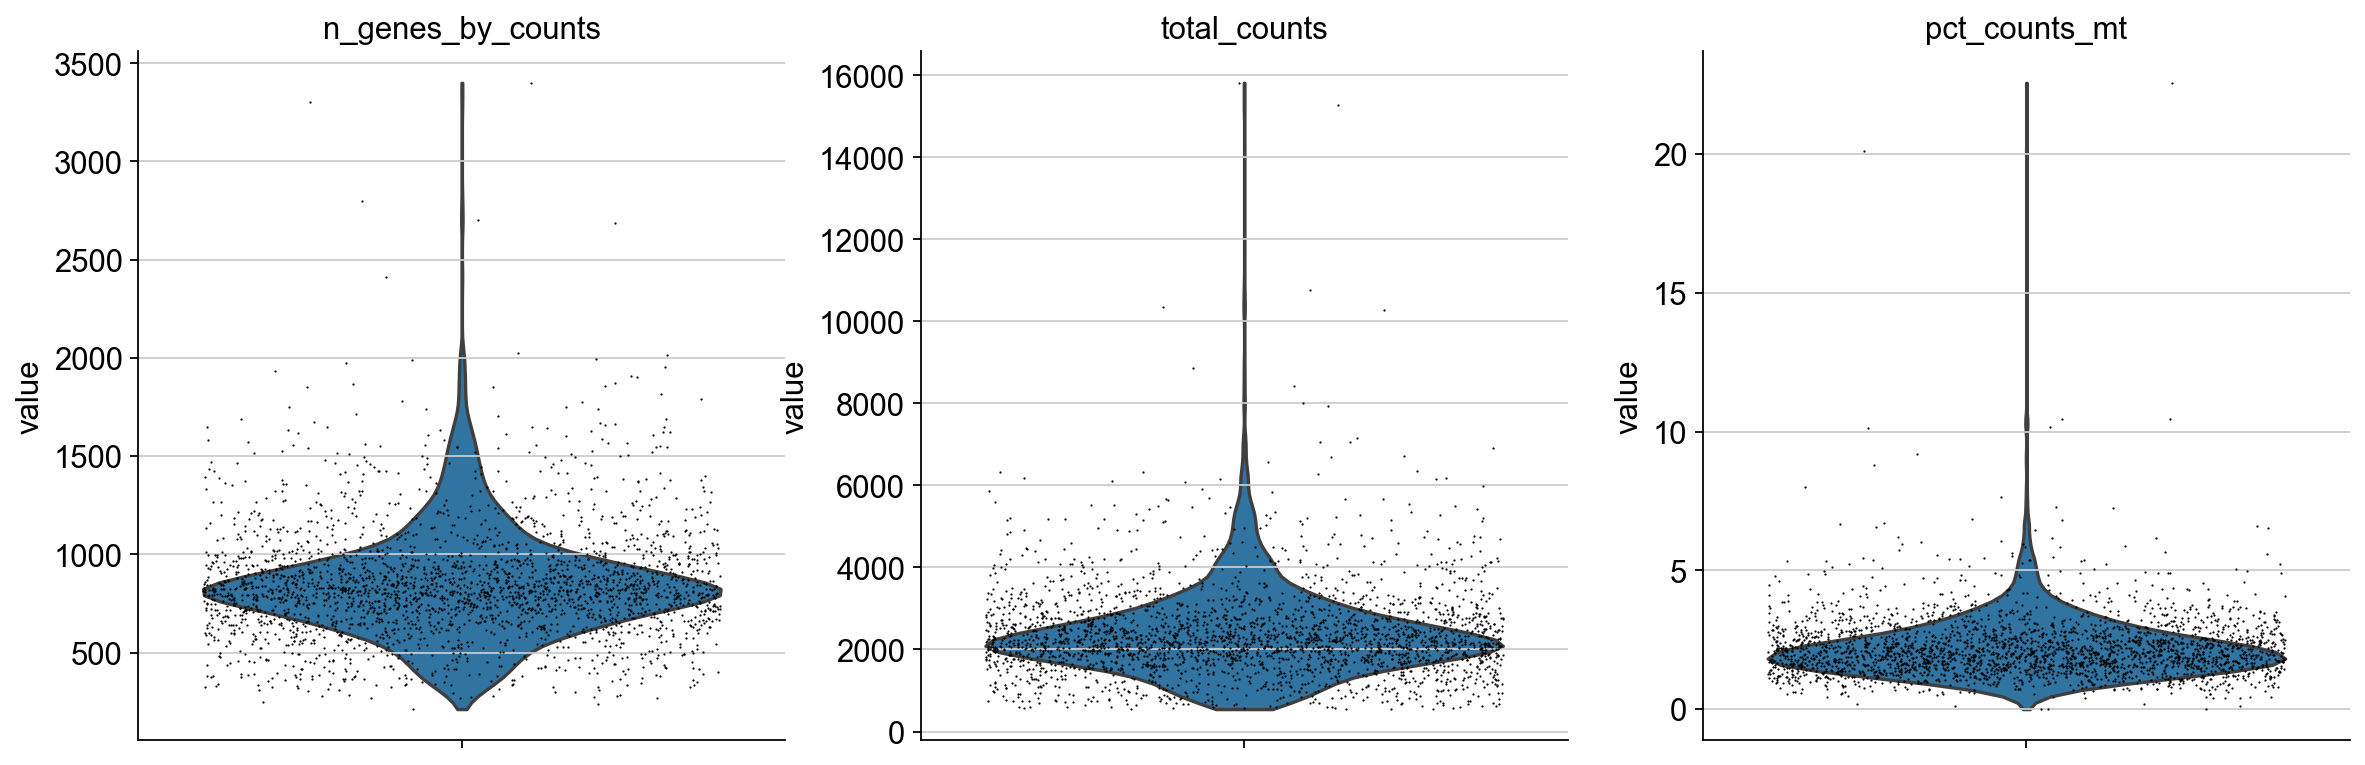

In [16]:
# To plot several qc metrics that were generated.

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
            jitter=0.4, multi_panel=True)

In [17]:
# To check the names of columns of var
adata.var.columns

Index(['gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts',
       'pct_dropout_by_counts', 'total_counts'],
      dtype='object')

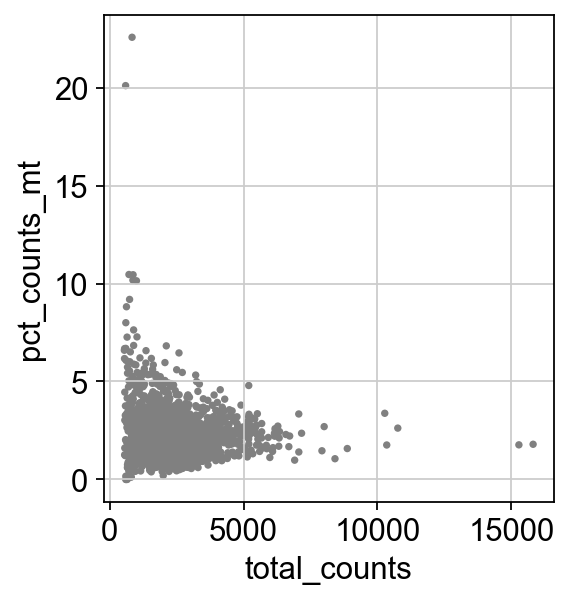

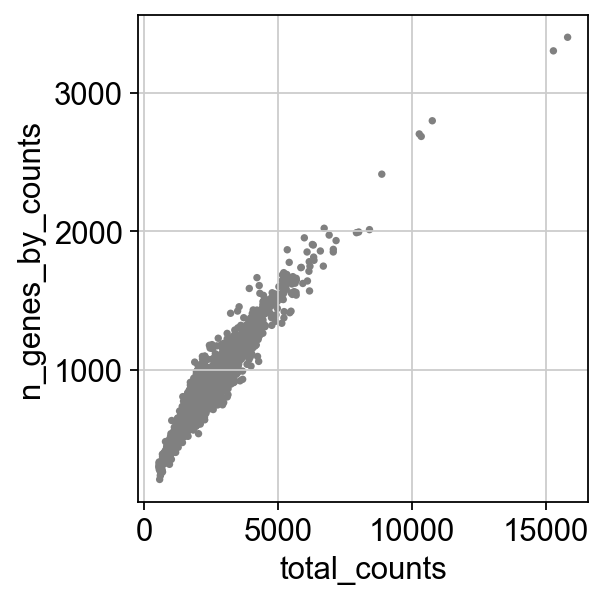

In [18]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [19]:
# filtering out cells

adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [20]:
adata.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACATACAACCAC-1      781                779        2419.0             73.0   
AAACATTGAGCTAC-1     1352               1352        4903.0            186.0   
AAACATTGATCAGC-1     1131               1129        3147.0             28.0   
AAACCGTGCTTCCG-1      960                960        2639.0             46.0   
AAACCGTGTATGCG-1      522                521         980.0             12.0   
...                   ...                ...           ...              ...   
TTTCGAACTCTCAT-1     1155               1153        3459.0             73.0   
TTTCTACTGAGGCA-1     1227               1224        3443.0             32.0   
TTTCTACTTCCTCG-1      622                622        1684.0             37.0   
TTTGCATGAGAGGC-1      454                452        1022.0             21.0   
TTTGCATGCCTCAC-1      724                723        1984.0             16.0   

                  pct_counts_mt  
AAACATACAACCAC-1       3.017776  
AAACATTGAGCTAC-1       3.793596  
AAACATTGATCAGC-1       0.889736  
AAACCGTGCTTCCG-1       1.743085  
AAACCGTGTATGCG-1       1.224490  
...                         ...  
TTTCGAACTCTCAT-1       2.110436  
TTTCTACTGAGGCA-1       0.929422  
TTTCTACTTCCTCG-1       2.197150  
TTTGCATGAGAGGC-1       2.054795  
TTTGCATGCCTCAC-1       0.806452  

[2638 rows x 5 columns]

In [21]:
sum(adata.obs.n_genes_by_counts < 2500)

2638

In [22]:
# Normalization
# target_sum=1e4 : specifies the target sum (1e4) of counts for each cell, meaning that the total counts will be scaled to 10,000

sc.pp.normalize_total(adata, target_sum=1e4)

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [23]:
adata.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACATACAACCAC-1      781                779        2419.0             73.0   
AAACATTGAGCTAC-1     1352               1352        4903.0            186.0   
AAACATTGATCAGC-1     1131               1129        3147.0             28.0   
AAACCGTGCTTCCG-1      960                960        2639.0             46.0   
AAACCGTGTATGCG-1      522                521         980.0             12.0   
...                   ...                ...           ...              ...   
TTTCGAACTCTCAT-1     1155               1153        3459.0             73.0   
TTTCTACTGAGGCA-1     1227               1224        3443.0             32.0   
TTTCTACTTCCTCG-1      622                622        1684.0             37.0   
TTTGCATGAGAGGC-1      454                452        1022.0             21.0   
TTTGCATGCCTCAC-1      724                723        1984.0             16.0   

                  pct_counts_mt  
AAACATACAACCAC-1       3.017776  
AAACATTGAGCTAC-1       3.793596  
AAACATTGATCAGC-1       0.889736  
AAACCGTGCTTCCG-1       1.743085  
AAACCGTGTATGCG-1       1.224490  
...                         ...  
TTTCGAACTCTCAT-1       2.110436  
TTTCTACTGAGGCA-1       0.929422  
TTTCTACTTCCTCG-1       2.197150  
TTTGCATGAGAGGC-1       2.054795  
TTTGCATGCCTCAC-1       0.806452  

[2638 rows x 5 columns]

In [24]:
# To check the names of columns of obs
adata.obs.columns

Index(['n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt',
       'pct_counts_mt'],
      dtype='object')

In [25]:
# Log transformation
## Why Logarithmize the data? 1. Variance stabilization 2. Mitigating the impact of highly expresed genes 3. Linearizing multiplicative relationships 4. Improving data normality
sc.pp.log1p(adata)

In [26]:
# Identify highly-variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [27]:
# check the new columns after sc.pp.highly_variable_genes()
adata.var.head(5)

gene_ids  n_cells     mt  n_cells_by_counts  \
AL627309.1     ENSG00000237683        9  False                  9   
AP006222.2     ENSG00000228463        3  False                  3   
RP11-206L10.2  ENSG00000228327        5  False                  5   
RP11-206L10.9  ENSG00000237491        3  False                  3   
LINC00115      ENSG00000225880       18  False                 18   

               mean_counts  pct_dropout_by_counts  total_counts  \
AL627309.1        0.003333              99.666667           9.0   
AP006222.2        0.001111              99.888889           3.0   
RP11-206L10.2     0.001852              99.814815           5.0   
RP11-206L10.9     0.001111              99.888889           3.0   
LINC00115         0.006667              99.333333          18.0   

               highly_variable     means  dispersions  dispersions_norm  
AL627309.1               False  0.013556     1.432845         -0.624328  
AP006222.2               False  0.004696     1.458631         -0.573416  
RP11-206L10.2            False  0.005673     1.325459         -0.836358  
RP11-206L10.9            False  0.002644     0.859264         -1.756848  
LINC00115                False  0.027437     1.457477         -0.575693

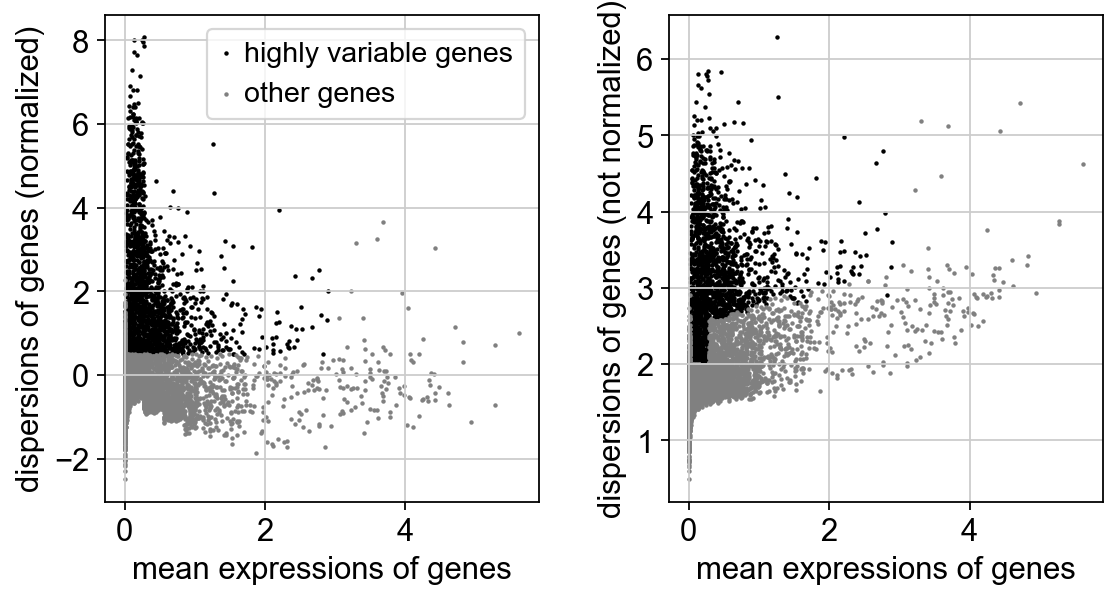

In [28]:
# Visualization of highly variable genes
sc.pl.highly_variable_genes(adata)

In [29]:
# Set the .raw attribute of the AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object
adata.raw = adata

# You can get back an AnnData of the object in .raw by calling .raw.to_adata().

In [30]:
# Actually, do the filtering (if adata.var.highly_variable is false, it will be filtered out)
# highly_variable is boolean
# adata.var.highly_variable = adata.var['highly_variable']

adata = adata[:, adata.var.highly_variable]

In [31]:
# As you can see the highly_variable column, there is no false
adata.var

gene_ids  n_cells     mt  n_cells_by_counts  mean_counts  \
TNFRSF4  ENSG00000186827      155  False                155     0.077407   
CPSF3L   ENSG00000127054      202  False                202     0.094815   
ATAD3C   ENSG00000215915        9  False                  9     0.009259   
C1orf86  ENSG00000162585      501  False                501     0.227778   
RER1     ENSG00000157916      608  False                608     0.298148   
...                  ...      ...    ...                ...          ...   
ICOSLG   ENSG00000160223       34  False                 34     0.016667   
SUMO3    ENSG00000184900      570  False                570     0.292963   
SLC19A1  ENSG00000173638       31  False                 31     0.018519   
S100B    ENSG00000160307       94  False                 94     0.076667   
PRMT2    ENSG00000160310      588  False                588     0.275926   

         pct_dropout_by_counts  total_counts  highly_variable     means  \
TNFRSF4              94.259259         209.0             True  0.277410   
CPSF3L               92.518519         256.0             True  0.385194   
ATAD3C               99.666667          25.0             True  0.038252   
C1orf86              81.444444         615.0             True  0.678283   
RER1                 77.481481         805.0             True  0.814813   
...                        ...           ...              ...       ...   
ICOSLG               98.740741          45.0             True  0.082016   
SUMO3                78.888889         791.0             True  0.804815   
SLC19A1              98.851852          50.0             True  0.058960   
S100B                96.518519         207.0             True  0.286282   
PRMT2                78.222222         745.0             True  0.816647   

         dispersions  dispersions_norm  
TNFRSF4     2.086050          0.665406  
CPSF3L      4.506987          2.955005  
ATAD3C      3.953486          4.352607  
C1orf86     2.713522          0.543183  
RER1        3.447533          1.582528  
...              ...               ...  
ICOSLG      2.585818          1.652185  
SUMO3       4.046776          2.431045  
SLC19A1     3.234231          2.932458  
S100B       3.042992          1.078783  
PRMT2       2.774169          0.629058  

[1838 rows x 11 columns]

In [32]:
# Regress out (remove) effects of unwanted variables from the expression data. The aim is to mitigate the impact of these variables on downstream analysis
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [33]:
# Although 'total_counts' & 'pct_counts_mt' are regressed out, those still exist in adata.
adata.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACATACAACCAC-1      781                779        2419.0             73.0   
AAACATTGAGCTAC-1     1352               1352        4903.0            186.0   
AAACATTGATCAGC-1     1131               1129        3147.0             28.0   
AAACCGTGCTTCCG-1      960                960        2639.0             46.0   
AAACCGTGTATGCG-1      522                521         980.0             12.0   
...                   ...                ...           ...              ...   
TTTCGAACTCTCAT-1     1155               1153        3459.0             73.0   
TTTCTACTGAGGCA-1     1227               1224        3443.0             32.0   
TTTCTACTTCCTCG-1      622                622        1684.0             37.0   
TTTGCATGAGAGGC-1      454                452        1022.0             21.0   
TTTGCATGCCTCAC-1      724                723        1984.0             16.0   

                  pct_counts_mt  
AAACATACAACCAC-1       3.017776  
AAACATTGAGCTAC-1       3.793596  
AAACATTGATCAGC-1       0.889736  
AAACCGTGCTTCCG-1       1.743085  
AAACCGTGTATGCG-1       1.224490  
...                         ...  
TTTCGAACTCTCAT-1       2.110436  
TTTCTACTGAGGCA-1       0.929422  
TTTCTACTTCCTCG-1       2.197150  
TTTGCATGAGAGGC-1       2.054795  
TTTGCATGCCTCAC-1       0.806452  

[2638 rows x 5 columns]

In [34]:
# This function standardizes the expression data of each gene to have zero mean and unit variance.
# So, the goal of the scaling is to ensure that each gene contributes equally to downstream analysis by giving them the same weight.
# Necessary before dimensionality reduction

sc.pp.scale(adata, max_value=10) # this parameter is to limit the maximum value of the scaled data

In [35]:
# after scaling data, mean % std were added in adata.var
adata.var.head(5)

gene_ids  n_cells     mt  n_cells_by_counts  mean_counts  \
TNFRSF4  ENSG00000186827      155  False                155     0.077407   
CPSF3L   ENSG00000127054      202  False                202     0.094815   
ATAD3C   ENSG00000215915        9  False                  9     0.009259   
C1orf86  ENSG00000162585      501  False                501     0.227778   
RER1     ENSG00000157916      608  False                608     0.298148   

         pct_dropout_by_counts  total_counts  highly_variable     means  \
TNFRSF4              94.259259         209.0             True  0.277410   
CPSF3L               92.518519         256.0             True  0.385194   
ATAD3C               99.666667          25.0             True  0.038252   
C1orf86              81.444444         615.0             True  0.678283   
RER1                 77.481481         805.0             True  0.814813   

         dispersions  dispersions_norm          mean       std  
TNFRSF4     2.086050          0.665406 -3.672069e-10  0.424481  
CPSF3L      4.506987          2.955005 -2.372437e-10  0.460416  
ATAD3C      3.953486          4.352607  8.472988e-12  0.119465  
C1orf86     2.713522          0.543183  3.389195e-10  0.685145  
RER1        3.447533          1.582528  7.696297e-11  0.736050

In [36]:
# PCA
# 'arpack' : one of the solver. This is suitable for smaller datasets. cf. 'randomized' for larger datasets

sc.tl.pca(adata, svd_solver = 'arpack') # tl (tool), svd (singular value decomposition)

In [37]:
adata

# uns (Unstructured), obsm (Observation Matrix), varm (Variable Matrix)

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

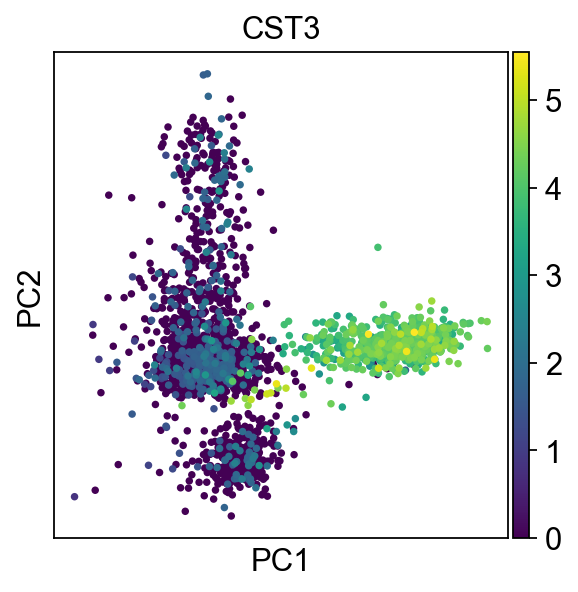

In [38]:
sc.pl.pca(adata, color = 'CST3')

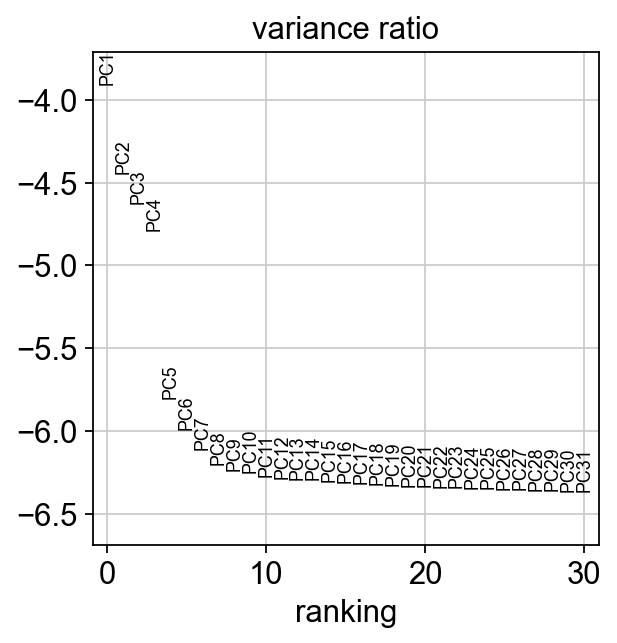

In [39]:
sc.pl.pca_variance_ratio(adata, log=True)

In [40]:
## Computing the neighborhood graph

sc.pp.neighbors (adata, n_neighbors=10, n_pcs=40)

In [41]:
sc.tl.leiden(adata)

In [42]:
## Embedding the neighborhood graph

sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)
sc.tl.umap(adata, init_pos='paga')

In [43]:
sc.tl.umap(adata)

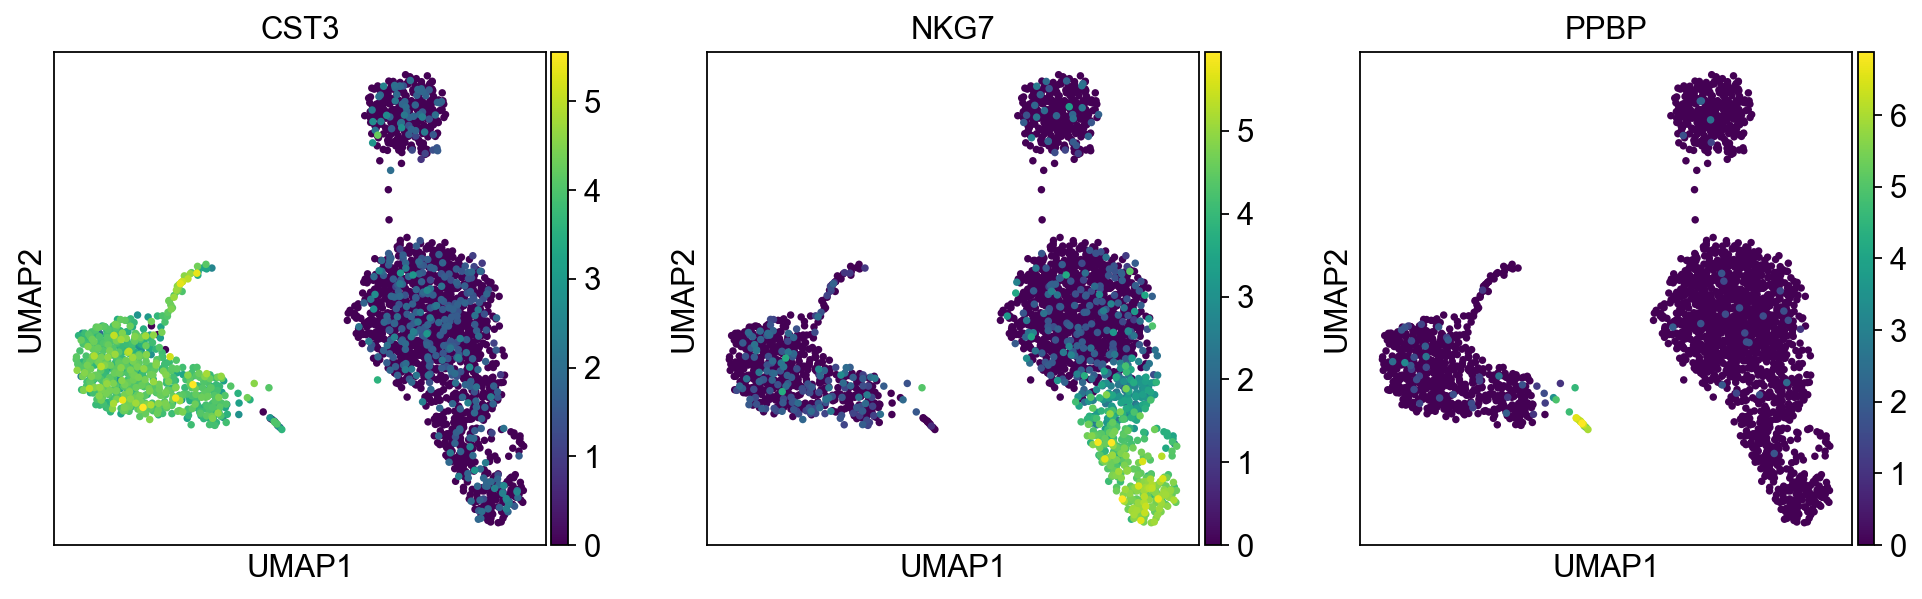

In [44]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

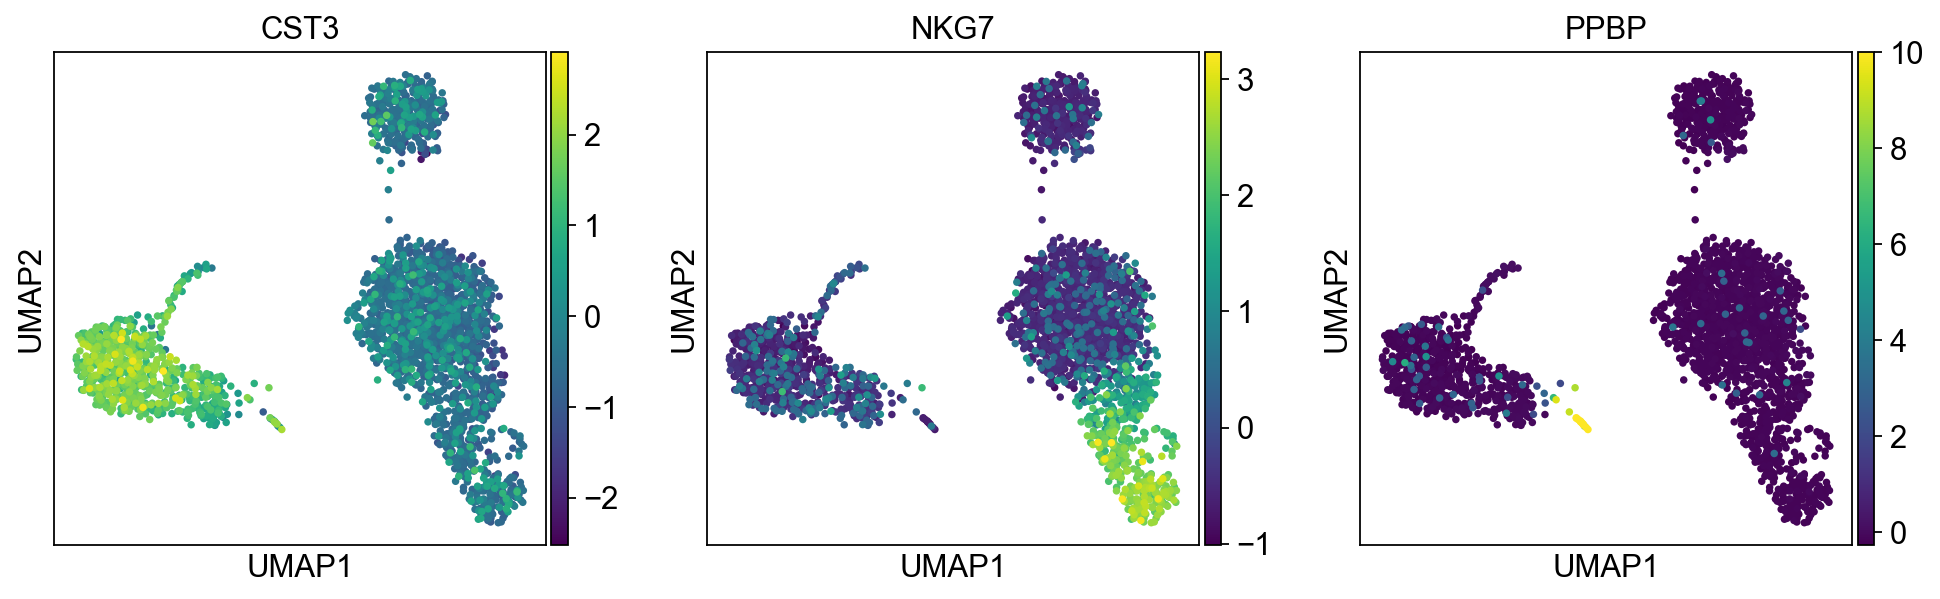

In [45]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

In [46]:
# the Leiden graph-clustering method is recommended (community detection based on optimizing modularity) by Traag et al. (2018)
sc.tl.leiden(adata)

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


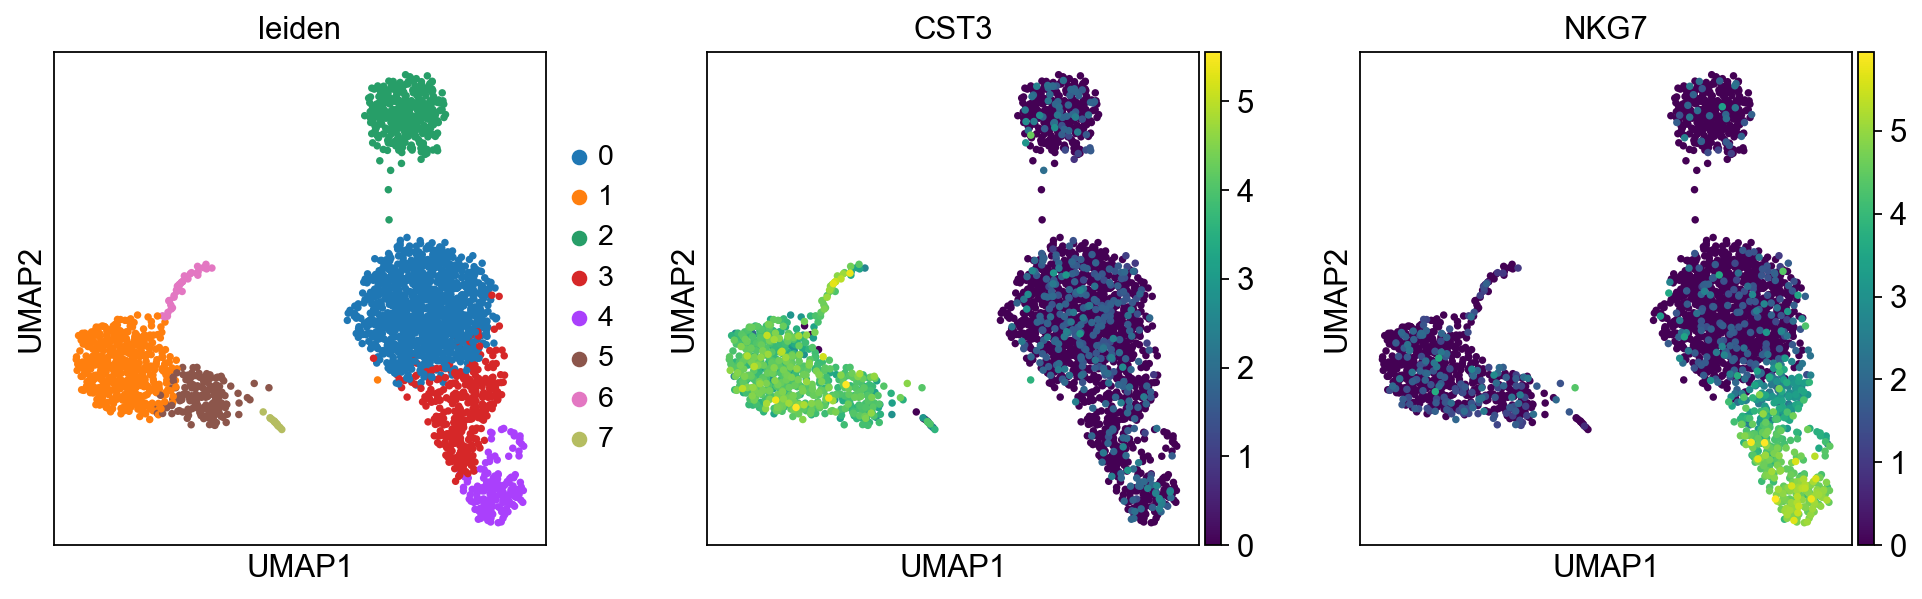

In [47]:
# color by leiden clustering & CST3, NKG7 gene

sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

In [48]:
adata.write('results_file.h5ad')

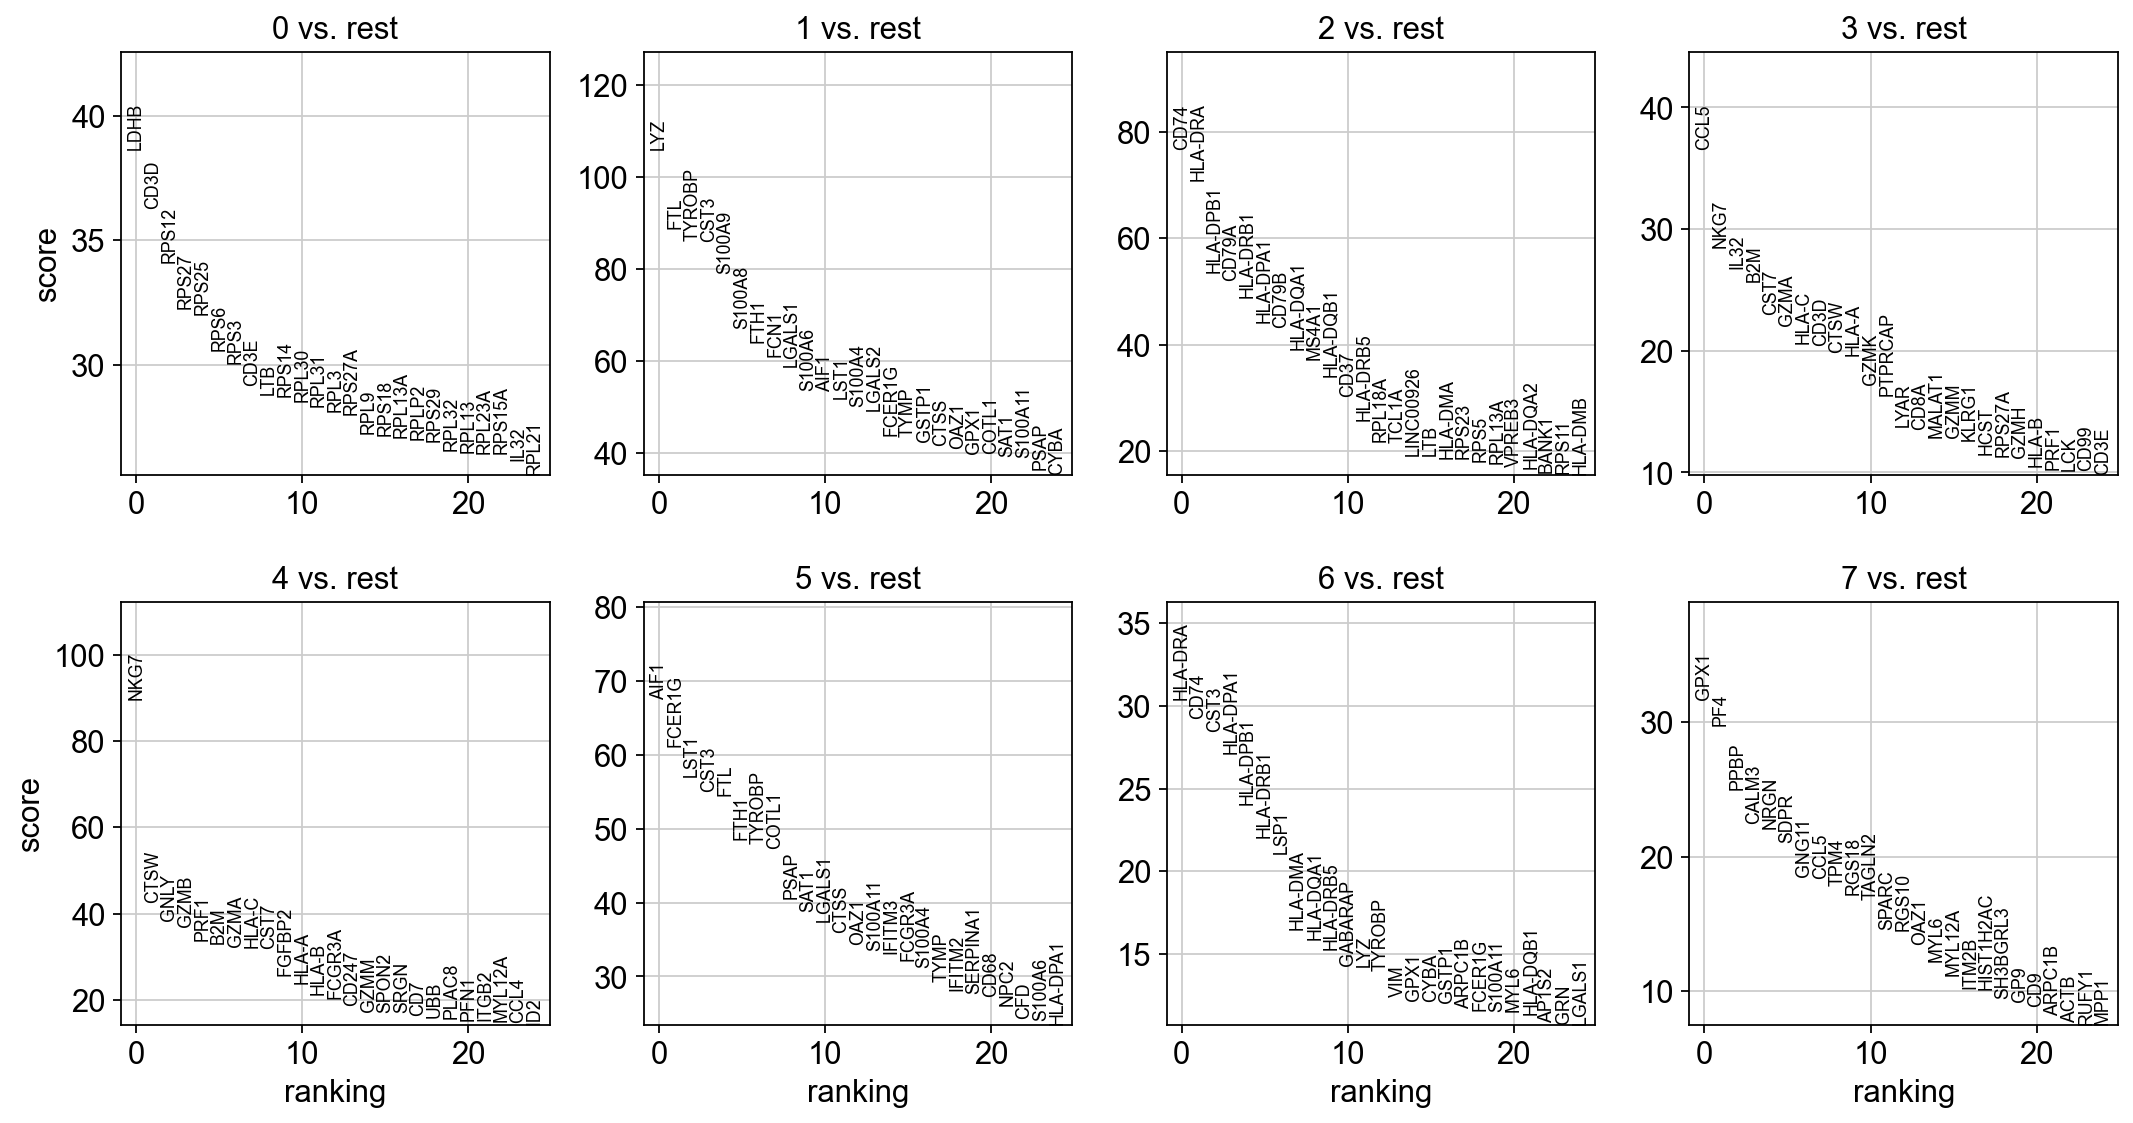

In [49]:
# Finding marker genes by rank_genes_group()

sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [50]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:05)


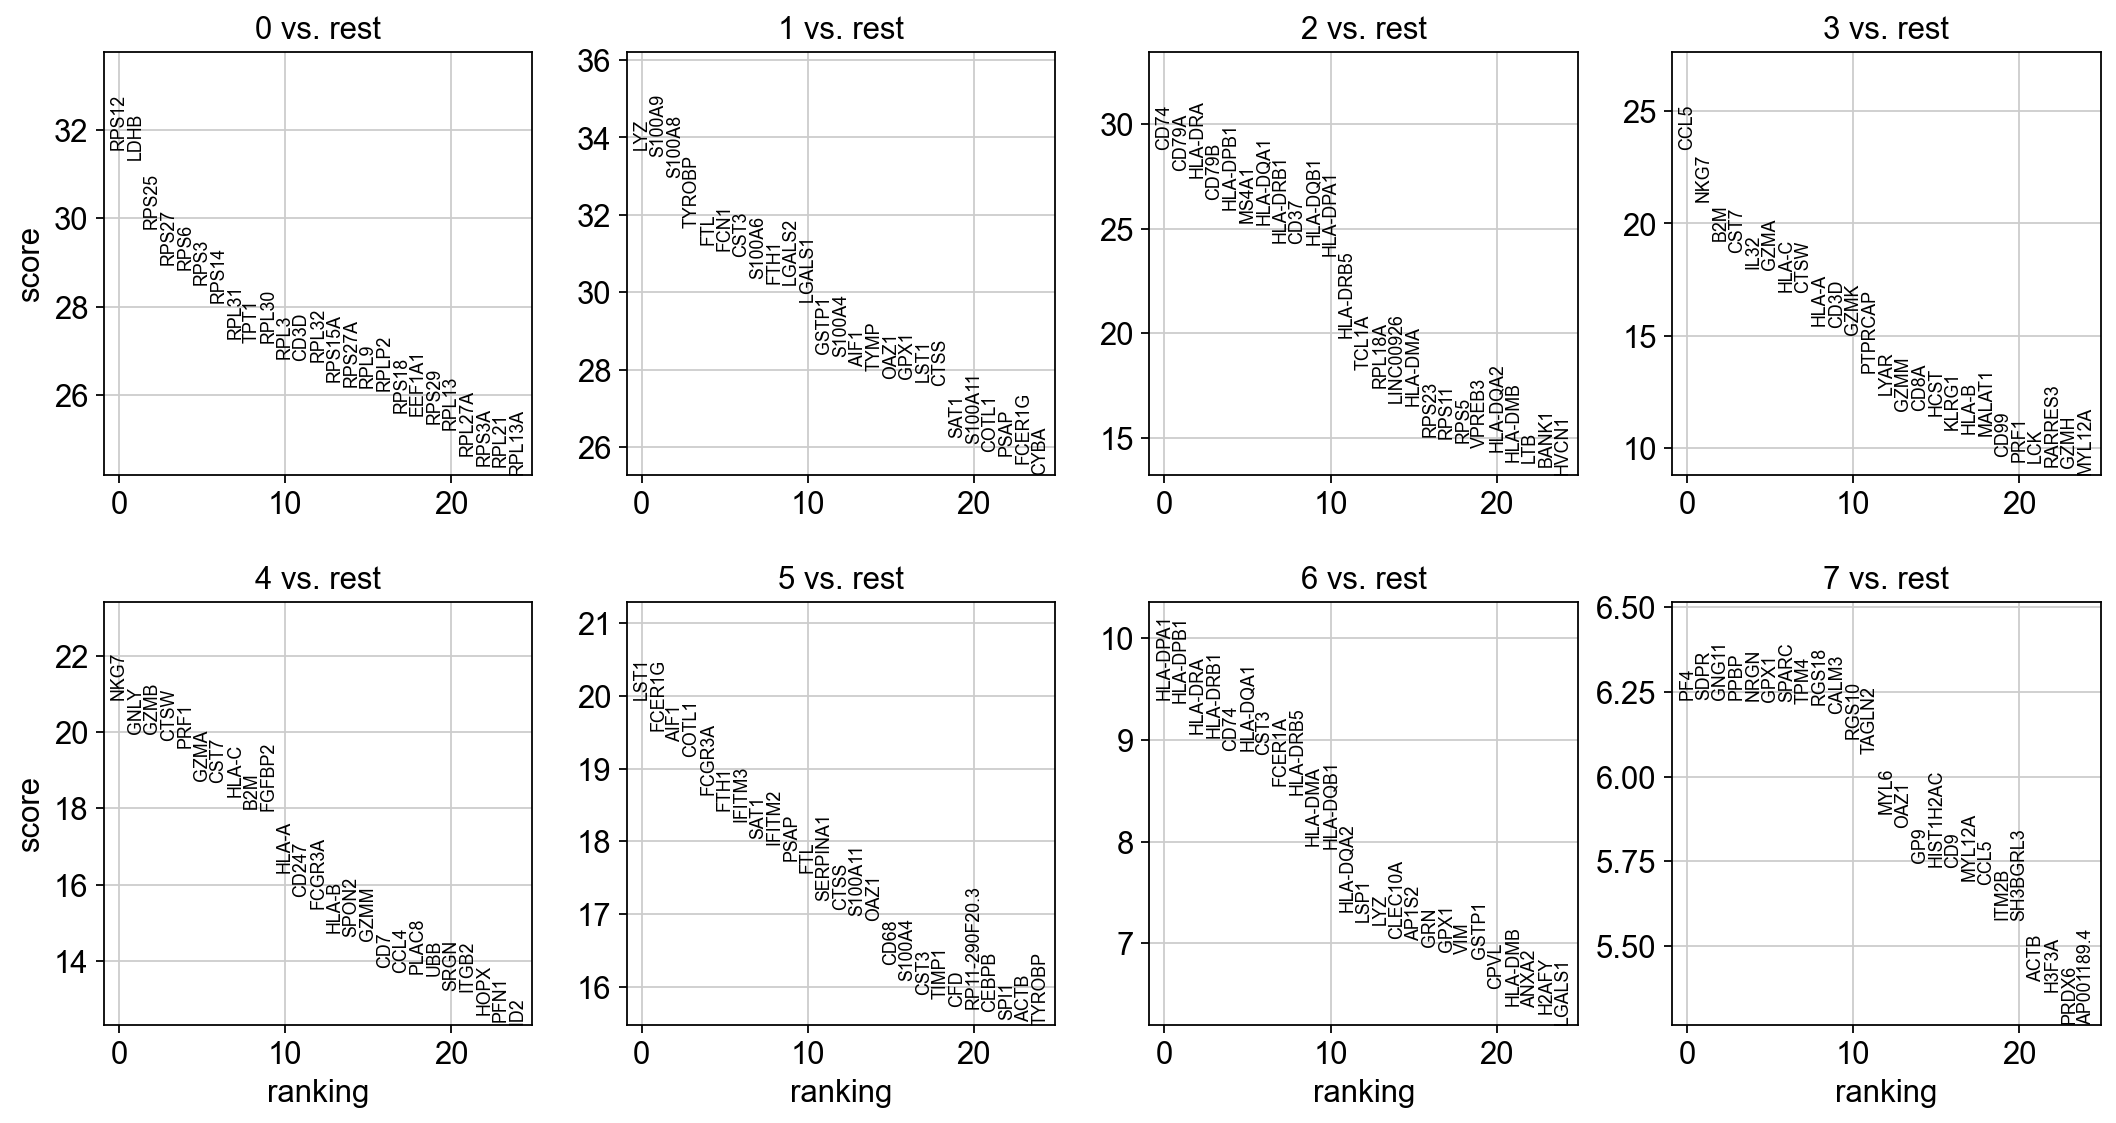

In [51]:
# The result of a Wilcoxon rank-sum (Mann-Whitney-U) test is very similar. We recommend using the latter in publications, see e.g., Sonison & Robinson (2018).
# You might also consider much more powerful differential testing packages like MAST, limma, DESeq2 and, for python, the recent diffxpy.

sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [52]:
adata.write('results_file.h5ad')

ranking genes
    finished (0:00:05)


/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


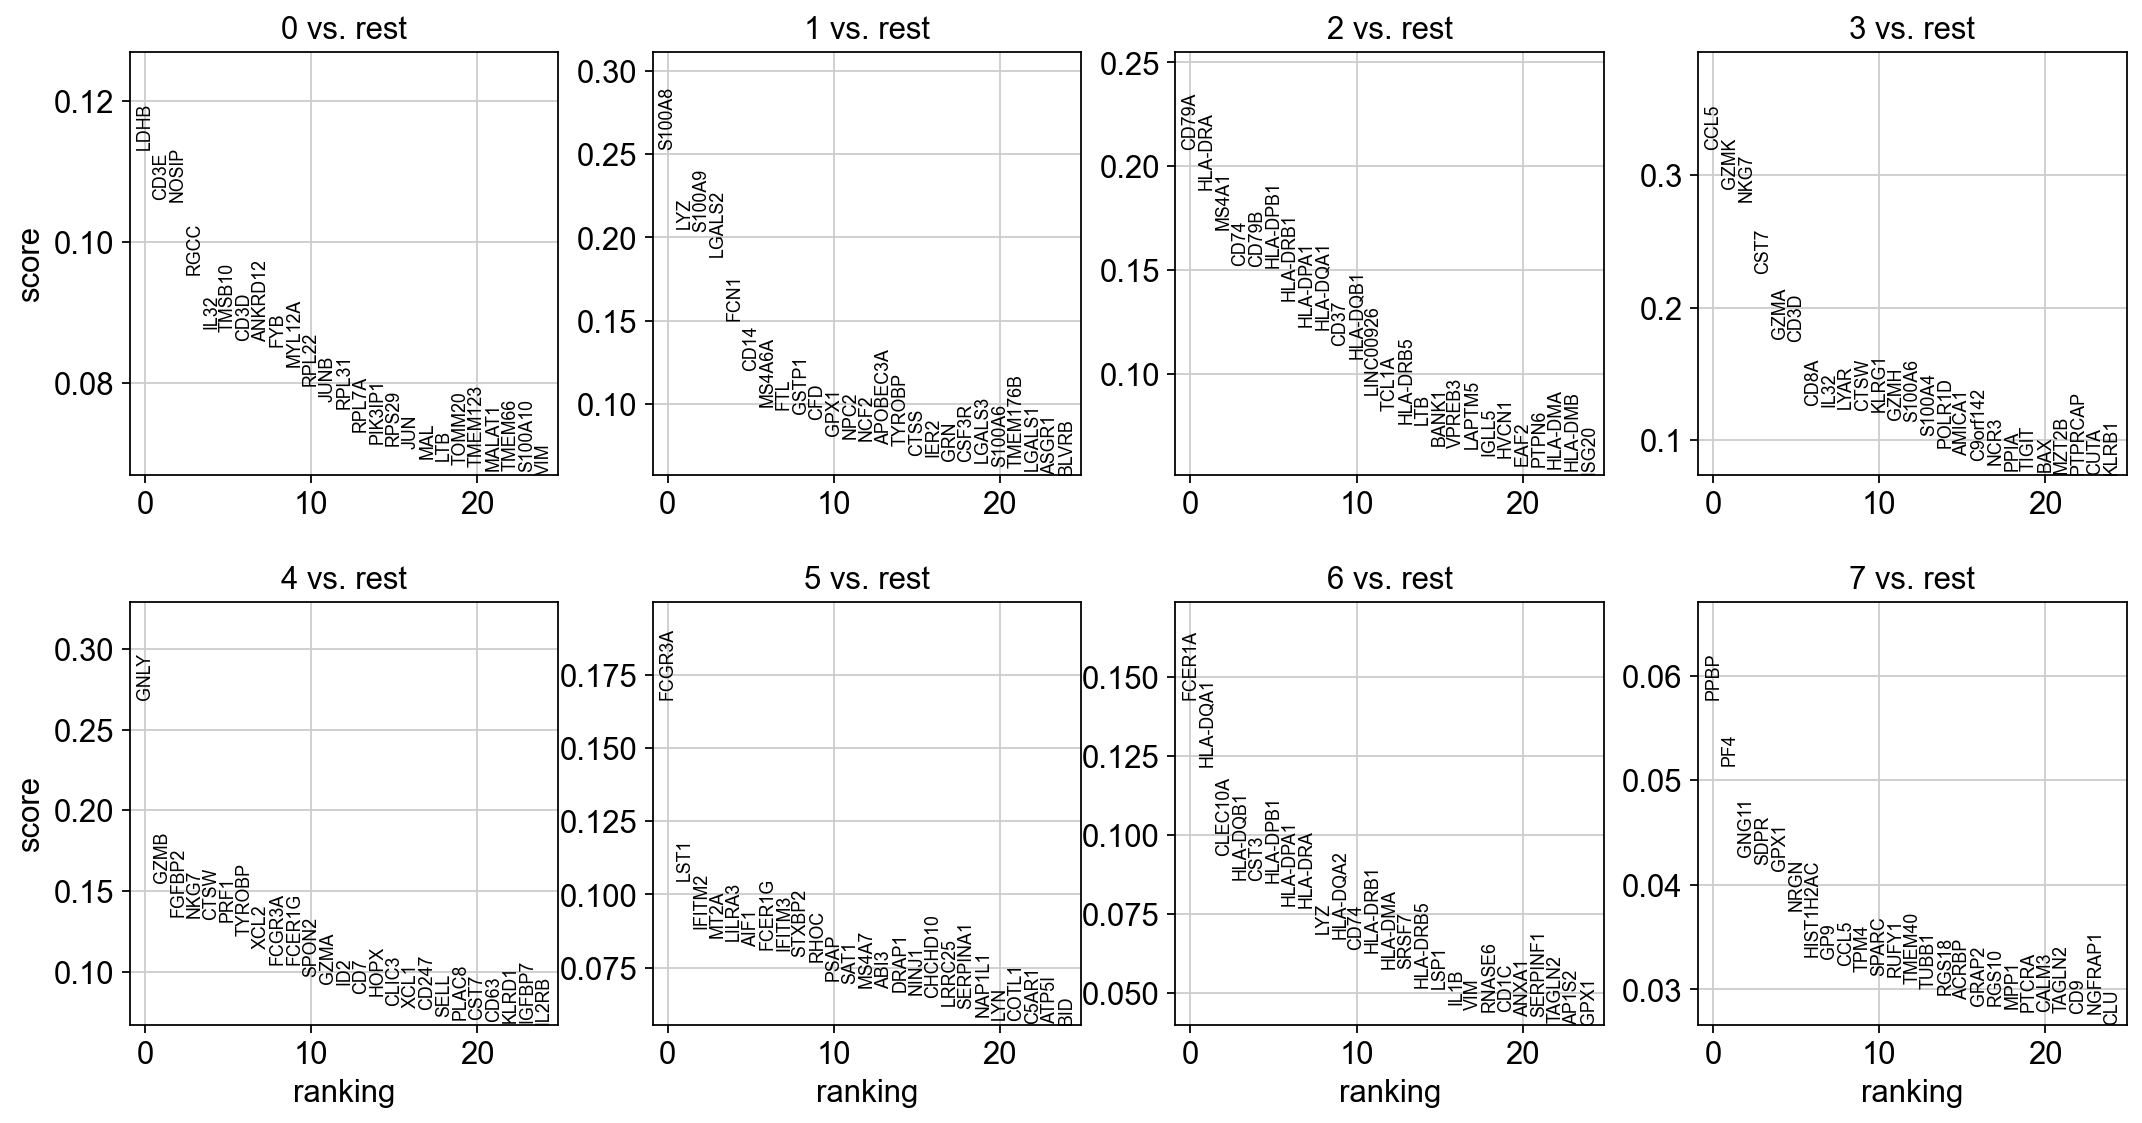

In [53]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [54]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [55]:
adata = sc.read('results_file.h5ad')

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [56]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [57]:
# Show the 10 top ranked genes per cluster 0, 1, …, 7 in a dataframe.

pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)                                                        

0       1         2     3     4       5         6      7
0  RPS12     LYZ      CD74  CCL5  NKG7    LST1  HLA-DPA1    PF4
1   LDHB  S100A9     CD79A  NKG7  GNLY  FCER1G  HLA-DPB1   SDPR
2  RPS25  S100A8   HLA-DRA   B2M  GZMB    AIF1   HLA-DRA  GNG11
3  RPS27  TYROBP     CD79B  CST7  CTSW   COTL1  HLA-DRB1   PPBP
4   RPS6     FTL  HLA-DPB1  IL32  PRF1  FCGR3A      CD74   NRGN

In [58]:
adata.uns['rank_genes_groups']['names']

array([('RPS12', 'LYZ', 'CD74', 'CCL5', 'NKG7', 'LST1', 'HLA-DPA1', 'PF4'),
       ('LDHB', 'S100A9', 'CD79A', 'NKG7', 'GNLY', 'FCER1G', 'HLA-DPB1', 'SDPR'),
       ('RPS25', 'S100A8', 'HLA-DRA', 'B2M', 'GZMB', 'AIF1', 'HLA-DRA', 'GNG11'),
       ...,
       ('HLA-DRA', 'RPS27', 'S100A6', 'FTH1', 'RPL28', 'RPL13A', 'RPL21', 'RPL11'),
       ('CYBA', 'RPS27A', 'TMSB4X', 'RPS11', 'RPL18A', 'RPL3', 'RPS27', 'MALAT1'),
       ('CD74', 'MALAT1', 'S100A4', 'TMSB10', 'RPL32', 'RPL13', 'MALAT1', 'RPL10')],
      dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O'), ('6', 'O'), ('7', 'O')])

In [59]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
             for group in groups for key in ['names', 'pvals']}).head(5)
                                                                    

0_n            0_p     1_n            1_p       2_n            2_p   3_n  \
0  RPS12  1.450311e-218     LYZ  7.634876e-249      CD74  3.043536e-182  CCL5   
1   LDHB  1.804688e-215  S100A9  4.626358e-246     CD79A  6.860832e-170  NKG7   
2  RPS25  1.142604e-194  S100A8  1.622835e-238   HLA-DRA  8.398068e-166   B2M   
3  RPS27  2.973102e-184  TYROBP  2.957652e-220     CD79B  1.171444e-153  CST7   
4   RPS6  8.289161e-183     FTL  2.479195e-214  HLA-DPB1  6.167786e-148  IL32   

             3_p   4_n           4_p     5_n           5_p       6_n  \
0  4.883619e-120  NKG7  1.203971e-96    LST1  1.322111e-88  HLA-DPA1   
1   9.229044e-98  GNLY  1.257170e-88  FCER1G  6.259712e-85  HLA-DPB1   
2   1.407930e-82  GZMB  1.429027e-88    AIF1  1.348814e-83   HLA-DRA   
3   3.420909e-78  CTSW  4.144726e-87   COTL1  5.974694e-82  HLA-DRB1   
4   1.722747e-72  PRF1  1.692100e-85  FCGR3A  1.392377e-77      CD74   

            6_p    7_n           7_p  
0  5.422417e-21    PF4  4.722886e-10  
1  7.591860e-21   SDPR  4.733899e-10  
2  1.306768e-19  GNG11  4.733899e-10  
3  1.865104e-19   PPBP  4.744938e-10  
4  5.853161e-19   NRGN  4.800511e-10

ranking genes
    finished (0:00:02)


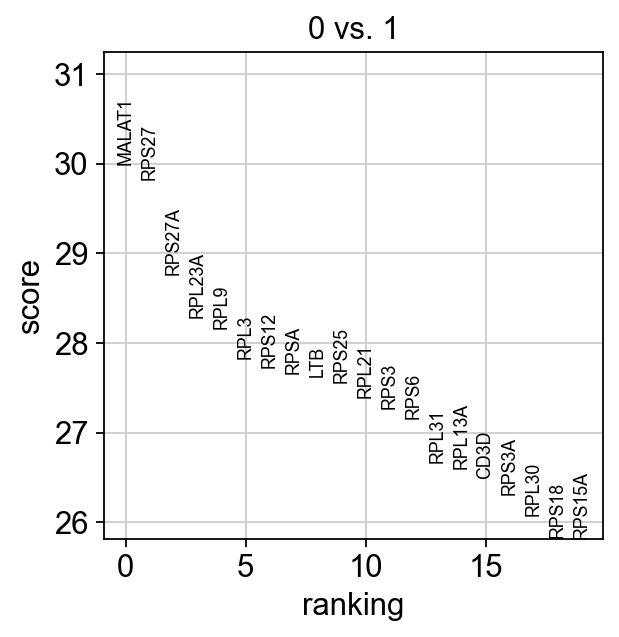

In [60]:
# Compare to a single cluster

sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


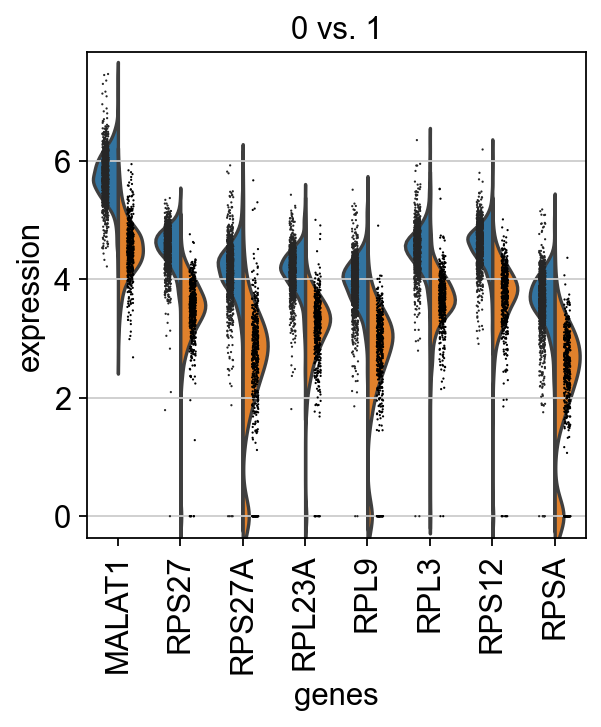

In [61]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [62]:
adata = sc.read('results_file.h5ad')

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


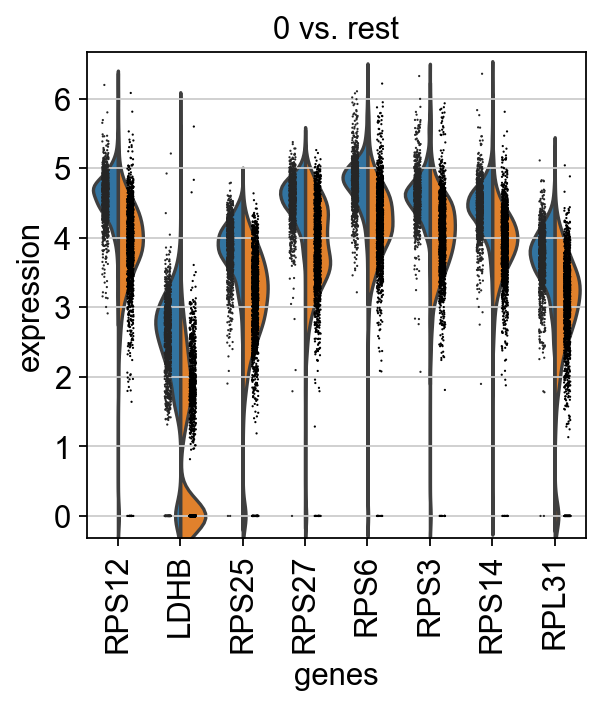

In [63]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

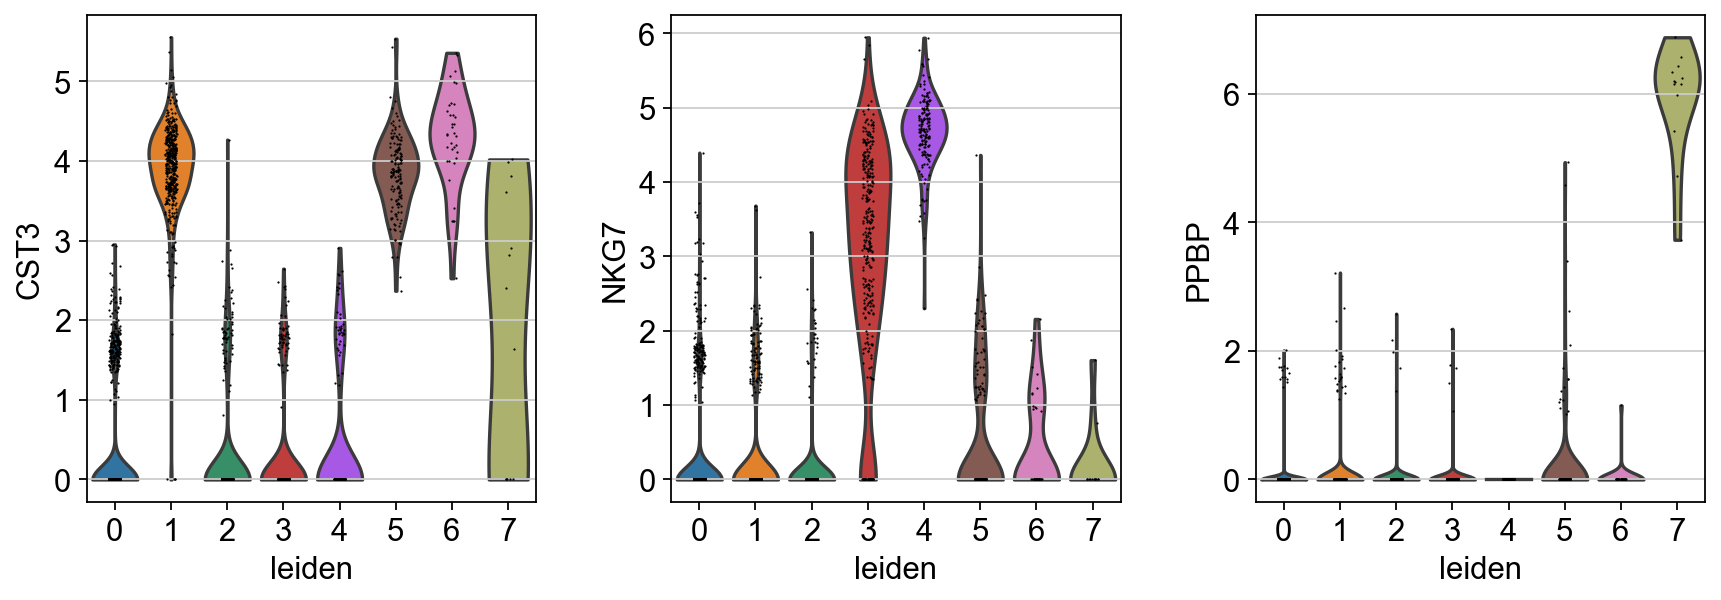

In [64]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')

In [65]:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


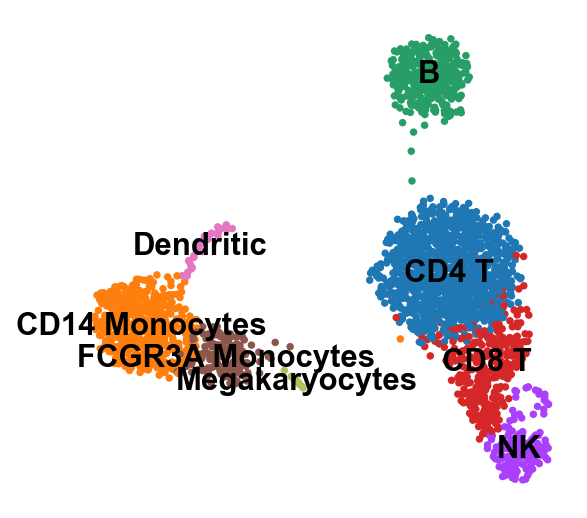

In [66]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

/Users/kwangwooko/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


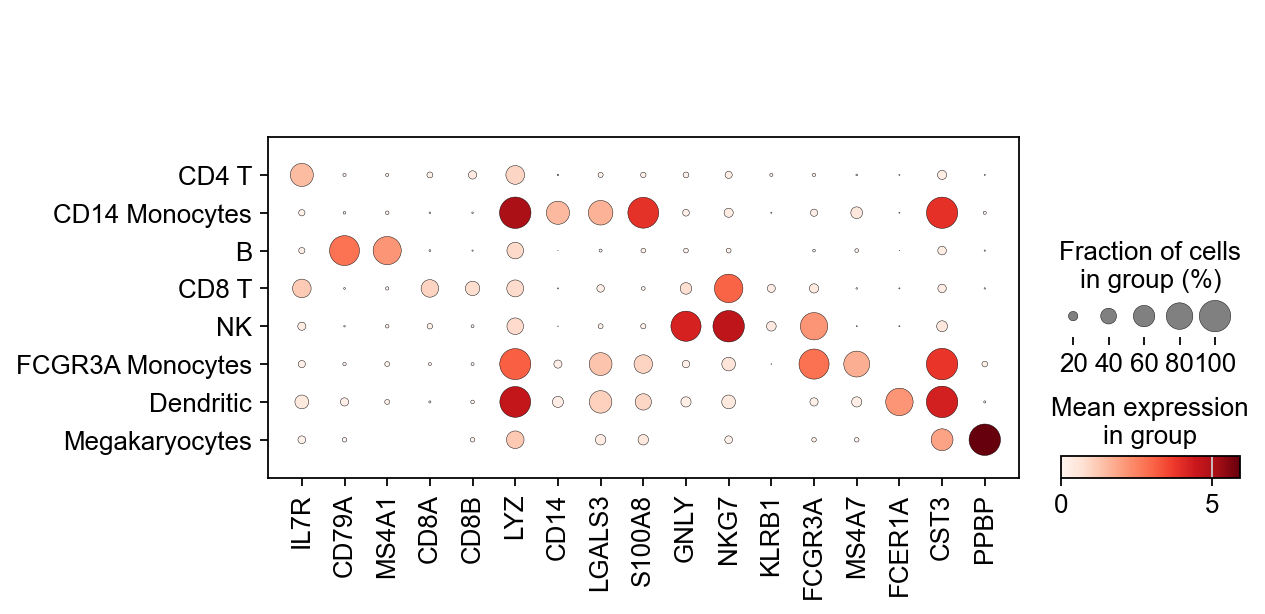

In [67]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

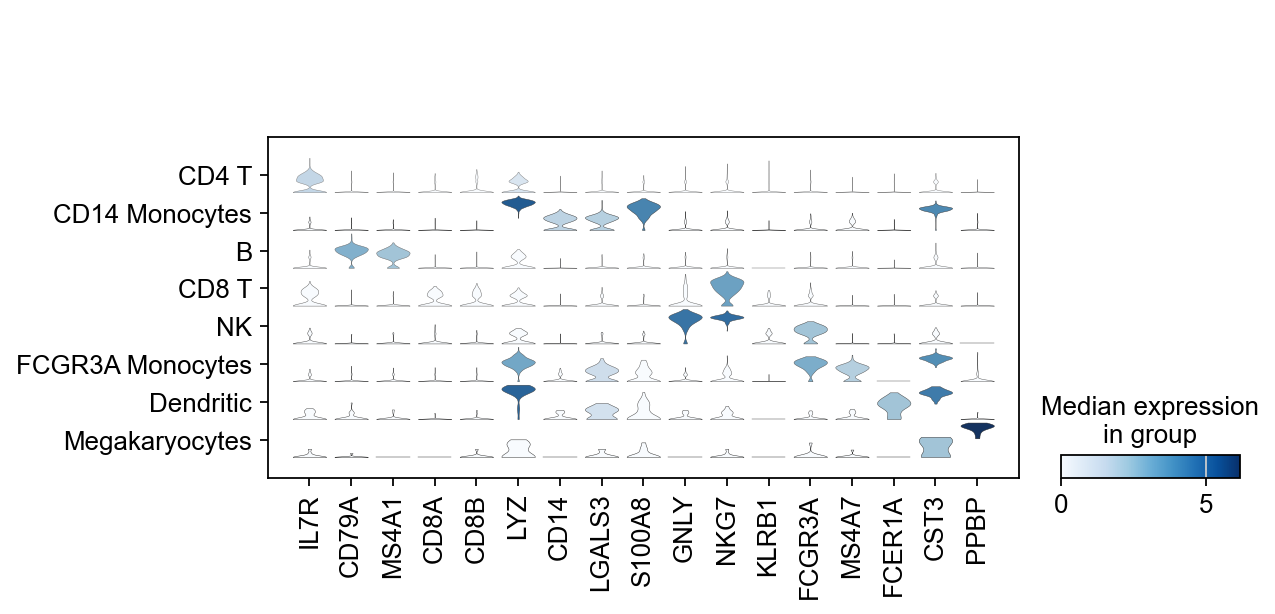

In [68]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

In [69]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [70]:
adata.write('results_file.h5ad')

In [72]:
# If you want to share this file with people who merely want to use it for visualization, a simple way to reduce the file size is by removing the dense scaled and corrected data matrix. The file still contains the raw data used in the visualizations in adata.raw.

adata.raw.to_adata().write('pbmc3k_withoutX.h5ad')